# Law, Order, and Algorithms
## Introduction to `R`

In [2]:
# Some initial setup
options(digits = 3)

### `R` basics

#### Assignment

The convention for assigning values to variables in `R` is an arrow (`<-`), where the direction of the arrow indicates the direction of assignment.
For example, if we want to assign the value `12` to a variable named `A`,

In [3]:
A <- 12   # This works
print(A)  # ... and this statement shows us ("prints") the value currently assigned to A
12 -> A   # So does this
print(A)

[1] 12
[1] 12


The more "standard" assignment using equal sign (`=`) also works, but _only for assignment to the left_. In other words

In [4]:
A = 12  # This works

In [5]:
12 = A  # But this doesn't!

ERROR: Error in 12 = A: invalid (do_set) left-hand side to assignment


#### Vectors

The native unit for variables in `R` is a vector. For example, the `A` variable we created above is actually a _vector_ of length 1.
We can create vectors of longer length by `c`ombining multiple values together.

In [6]:
X <- c(1, 2, 3)
print(X)
Y <- c("this", "that", "those")
print(Y)

[1] 1 2 3
[1] "this"  "that"  "those"


A `seq`uence of numbers can be created using `seq(from, to, by = 1)`.
In other words, there is a function called `seq()` which takes three arguments, each named `from`, `to`, and `by`. 
The last argument (`by`) is optional, and will be set to `by = 1` if not supplied. 
For example,

In [7]:
seq(1, 5)  # Creates a sequence of 1 to 5

[1] 1 2 3 4 5

In [8]:
seq(1, 5, 2)  # Creates a sequence of 1 to 5, but in steps of 2

[1] 1 3 5

Since sequences in steps of 1 are created quite often, `R` provides a short-hand notation in the form `from:to`. 
For example,

In [9]:
1:5  # Short-hand notation for generating a sequence of 1 to 5, in increments of 1

[1] 1 2 3 4 5

Use square braces (`[]`) to index a vector (the first element is at index `1`, _not_ `0`)

In [10]:
X <- c(10, 11, 12, 13)
X[1]

[1] 10

Note that you _can_ index a value that is larger than the length of the vector. 
`R` will NOT fail, but return a special value called `NA`.

In [11]:
X[500000]

[1] NA

In `R`, a _negative_ index is used to _exclude_ elements.

In [12]:
X[-1]  # This will return all but the first element of X

[1] 11 12 13

A vector can also be used to index multiple elements of another vector.
For example, if you want the second and fourth elements of `X`,

In [13]:
ind <- c(2, 4)  # A vector that we create for the sole purpose of indexing another vector, X
X[ind]          # We get the second and fourth elements of X, because ind = (2, 4)

[1] 11 13

#### Exercise: vector
Create a sequence of numbers from 5 to 10, and then select the numbers 6, 7, and 8 from this sequence.

In [14]:
# WRITE CODE HERE
# START solution
x <- 5:10
x[c(2,3,4)]
# END solution

[1] 6 7 8

#### Vector operations

Vector are a native data structure in `R`, and many operations are "vectorized", meaning that they work directly on vectors.
Basic math operations are done element-wise.

In [15]:
A <- c(1, 2)
B <- c(6, 2)

A + B  # == c(1 + 6, 2 + 2)

[1] 7 4

In [16]:
A - B  # == c(1 - 6, 2 - 2)

[1] -5  0

In [17]:
A * B  # == c(1 * 6, 2 * 2)

[1] 6 4

In [18]:
B / A  # == c(6 / 1, 2 / 2)

[1] 6 1

In [19]:
B^2  # == c(6*6, 2*2)

[1] 36  4

Comparisons are also done element-wise

In [20]:
A == B  # == c(1 == 6, 2 == 2)

[1] FALSE  TRUE

Note the double equal sign (`==`) for comparing equality! (One equal sign would be assignment.)

In [21]:
A < B  # == c(1 < 6, 2 < 2)

[1]  TRUE FALSE

There are many functions in `R` that operate on units of vectors. 
Some examples are:

In [22]:
X <- c(0.1, 1, 10, 100)
log(X)  # Element-wise log

[1] -2.30  0.00  2.30  4.61

In [23]:
exp(X)  # Element-wise exponential

[1] 1.11e+00 2.72e+00 2.20e+04 2.69e+43

In [24]:
sqrt(X)  # Element-wise square-root

[1]  0.316  1.000  3.162 10.000

In [25]:
mean(X)  # Mean

[1] 27.8

In [26]:
sd(X)  # (Sample) standard deviation

[1] 48.4

In [27]:
var(X)  # (Sample) variance

[1] 2338

In [28]:
max(X)  # Maximum value

[1] 100

In [29]:
min(X)  # Minimum value

[1] 0.1

In [30]:
median(X)  # Median value

[1] 5.5

In [31]:
sum(X)  # Sum of all values

[1] 111

In [32]:
prod(X)  # Product of all values

[1] 100

In [33]:
quantile(X, probs = c(.1, .5, .9))  # Quantile at specified probs

10%   50%   90% 
 0.37  5.50 73.00

In [34]:
length(X)  # Length of vector

[1] 4

#### Exercise: vector operations

Generate a sequence of 1,000 random numbers between 0 and 1, and calculate their
1. mean
2. variance
3. 25%, 50%, and 75% quantile

Hint: you can use `runif(n)` to generate n random numbers between 0 and 1.

In [35]:
# WRITE CODE HERE
# START solution
x <- runif(1000)

# mean
mean(x)

# variance
var(x)

# 25%, 50%, and 75% quantile
quantile(x, probs = c(.25, .5, .75))

# END solution

[1] 0.487

[1] 0.082

25%   50%   75% 
0.241 0.481 0.733

#### Strings

Use the `paste` function to concatenate two or more strings. 
Numerical values are automatically converted to strings.

In [36]:
paste("One plus one equals", 1 + 1, ".")

[1] "One plus one equals 2 ."

The `paste()` function has an optional `sep` argument, which you can use to specify how the different strings are `paste`d together.

In [37]:
paste("One plus one", 1 + 1, sep = " = ")

[1] "One plus one = 2"

Similar to `sep`, you can also use the optional `collapse` argument to concatenate a vector of strings instead of having them as individual arguments.

In [38]:
my_strings <- c("one", "plus", "one", "equals", "two")

paste(my_strings, collapse=" ")

[1] "one plus one equals two"

If you're familiar with `C`-style formatting, there is a `sprintf()` function, which literally calls the system `sprintf` `C`-library.

In [39]:
sprintf("One plus one = %d, and e = %.3f", 1 + 1, exp(1))

[1] "One plus one = 2, and e = 2.718"

#### Exercise: string operations

Suppose you are given a vector of strings denoting items that you have. Write R code to turn this vector into a English sentence in the form of "I have x, y, and z". Pay extra attention to the "and" at the end.

Example input: `c("one apple", "two pears", "three bananas")`

Example output: `I have one apple, two pears, and three bananas.`

In [40]:
my_items <- c("a can of Coke", "a bottle of Pepsi", "a glass of water")

# WRITE CODE HERE
# START solution
l <- length(my_items)

items_str <- paste(my_items[1:(l-1)], collapse = ", ")

paste("I have ", items_str, ", and ",my_items[l], sep="")

# or equivalently
paste0("I have ", items_str, ", and ",my_items[l])

# END solution

[1] "I have a can of Coke, a bottle of Pepsi, and a glass of water"

[1] "I have a can of Coke, a bottle of Pepsi, and a glass of water"

### Packages

`R` packages can be installed using the `install.packages()` function.
For example, to install the `tidyverse` package (which will be used primarily in this course) you can run:
`install.packages("tidyverse")`

This is like installing a piece of software, and only needs to be done once on any machine.

Once a package is installed, it can be "loaded" into the current environment with the `library` function.
For example, to load the `tidyverse` package, run

In [41]:
library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Unlike `install.packages`, this needs to be done whenever you're on a new session/environment.

### Intro to `ggplot`: visualizing potential racial bias in NYC stop-and-frisk data

Now we will explore how we can make plots using `ggplot`, which is part of the `tidyverse` library.

We will use the stop-and-frisk data from New York city.
"Stop-and-frisk" is a police practice of temporarily detaining, questioning, and at times searching civilians on the street for weapons and other contraband.
In New York City, between 2003 and 2013, over 100,000 stops were made per year, with 685,724 people being stopped at the height of the program in 2011.
The vast majority of those stopped were African-American or Latino, raising concerns of racial bias.

The only legal reason for an officer to conduct a frisk is for officer safety. In other words, the only justified goal of a frisk is to recover weapons under reasonable suspicion.
Therefore, one way to examine the stop-and-frisk threshold is to check the "hit rate" of frisks.
Hit rate is defined as the percent of cases in which weapon is found among stops for suspicion of criminal possession of a weapon (CPW).
If Black individuals that are frisked have a higher hit rate than white individuals, we have a reason to believe the police might have a lower stop-and-frisk threshold for Black individuals \[discuss: why?\].

Now let's plot the hit rate for white and Black individuals in this dataset and examine whether they seem to be subject to the same threshold of reasonable suspicion?
We will come back to this data later in this class for a more in-depth analysis.

In [42]:
# set ggplot theme
theme_set(theme_bw())

# let's first load the data
load('../data/sqf.Rdata')

# display first few rows of the hitrate_by_precinct dataframe,
# which contains the hit rate for Black and white individuals in each precinct in NYC
head(hitrate_by_precinct)

precinct,black,white
<fct>,<dbl>,<dbl>
1,0.1096,0.263
5,0.0592,0.232
6,0.0696,0.206
7,0.0301,0.157
9,0.0505,0.242
10,0.0803,0.184


Let's first plot the black hit rate against white hit rate in each precinct

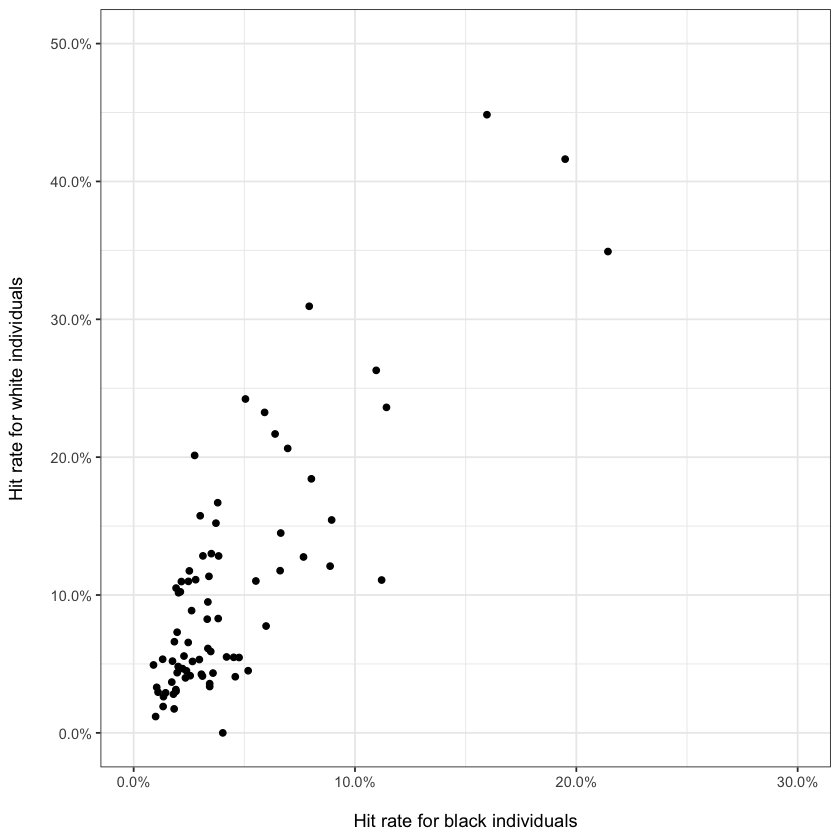

In [43]:
p <- ggplot(data=hitrate_by_precinct, aes(x=black, y=white)) +
  geom_point() +
  scale_x_continuous('\nHit rate for black individuals',
                     labels=scales::percent, limits=c(0, .3)) +
  scale_y_continuous('Hit rate for white individuals\n',
                     labels=scales::percent, limits=c(0, .5))

p

We then plot a line with slope of 1. If a point lies above the line, it indicates white individuals have a higher hit rate than black individuals in that precinct.

\[Discuss: What do we see here? What can we say about the stop-and-frisk policy?\]

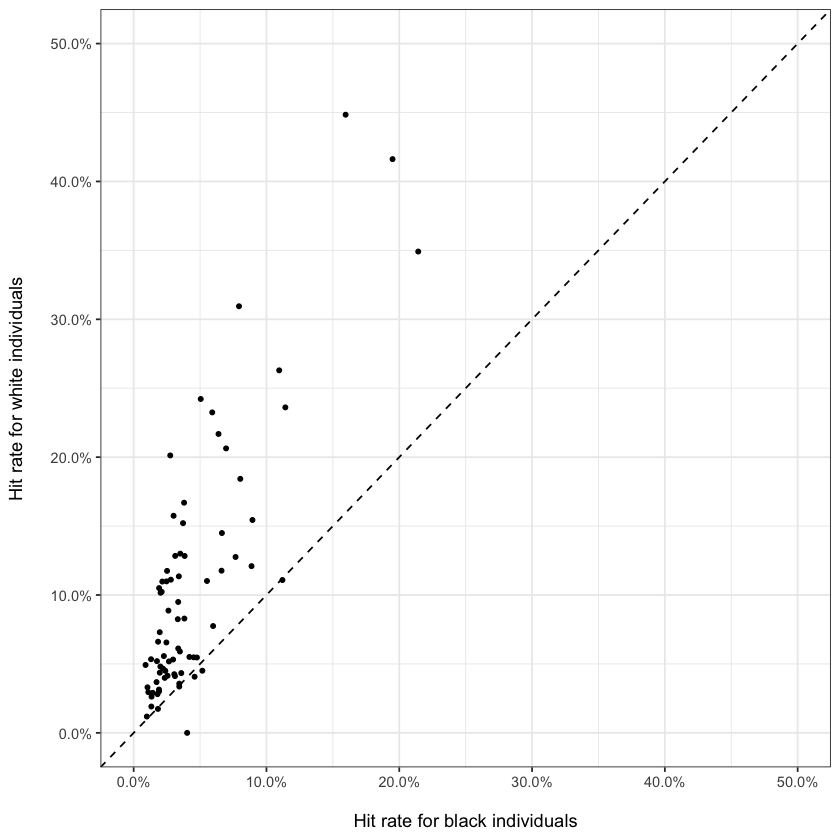

In [44]:
p <- ggplot(data=hitrate_by_precinct, aes(x=black, y=white)) +
  geom_point(size=1) +
  geom_abline(slope=1, intercept=0, linetype='dashed') +
  scale_x_continuous('\nHit rate for black individuals',
                     labels=scales::percent, limits=c(0, .5)) +
  scale_y_continuous('Hit rate for white individuals\n',
                     labels=scales::percent, limits=c(0, .5))

p

Now let's look at the `hitrate_by_location` data, which further breaks down the stops in `hitrate_by_precinct` by location (`housing`, `transit`, or `neither`).

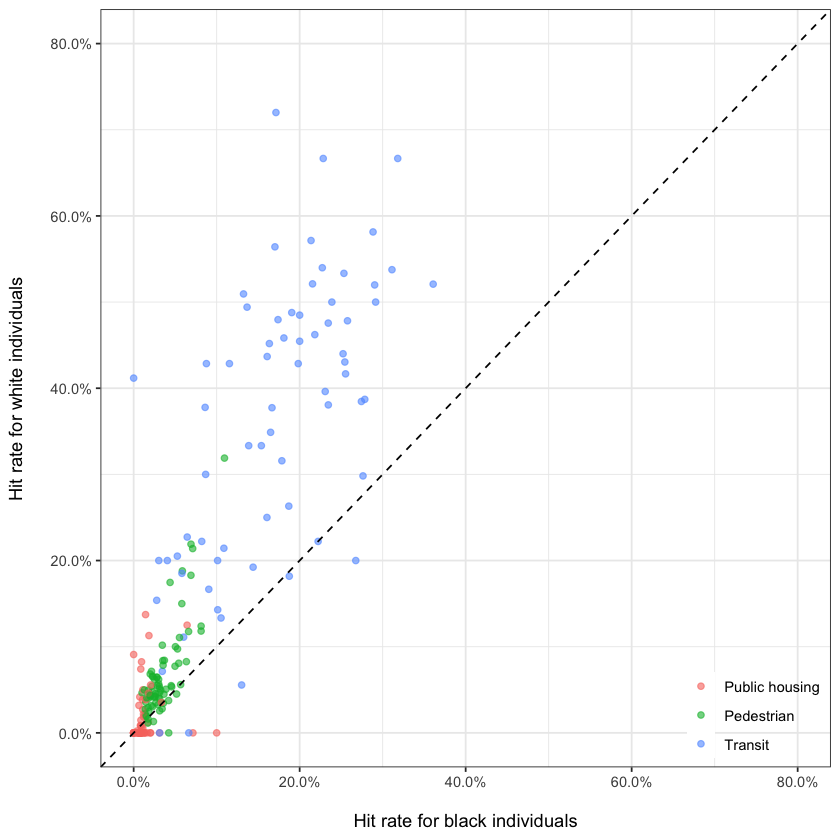

In [45]:
# We assign different colors to each location category
p <- ggplot(data=hitrate_by_location, aes(x=black, y=white,
                                          group=location.housing)) +
  geom_point(aes(color=location.housing), alpha=.6) +
  geom_abline(slope=1, intercept=0, linetype='dashed') +
  scale_color_discrete(element_blank(),
                       breaks=c('housing', 'neither', 'transit'),
                       labels=c('Public housing', 'Pedestrian', 'Transit')) +
  scale_x_continuous('\nHit rate for black individuals',
                     labels=scales::percent, limits=c(0, .8)) +
  scale_y_continuous('Hit rate for white individuals\n',
                     labels=scales::percent, limits=c(0, .8)) +
  theme(legend.position=c(1, 0), legend.justification=c(1, 0),
        legend.background=element_blank())

p

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


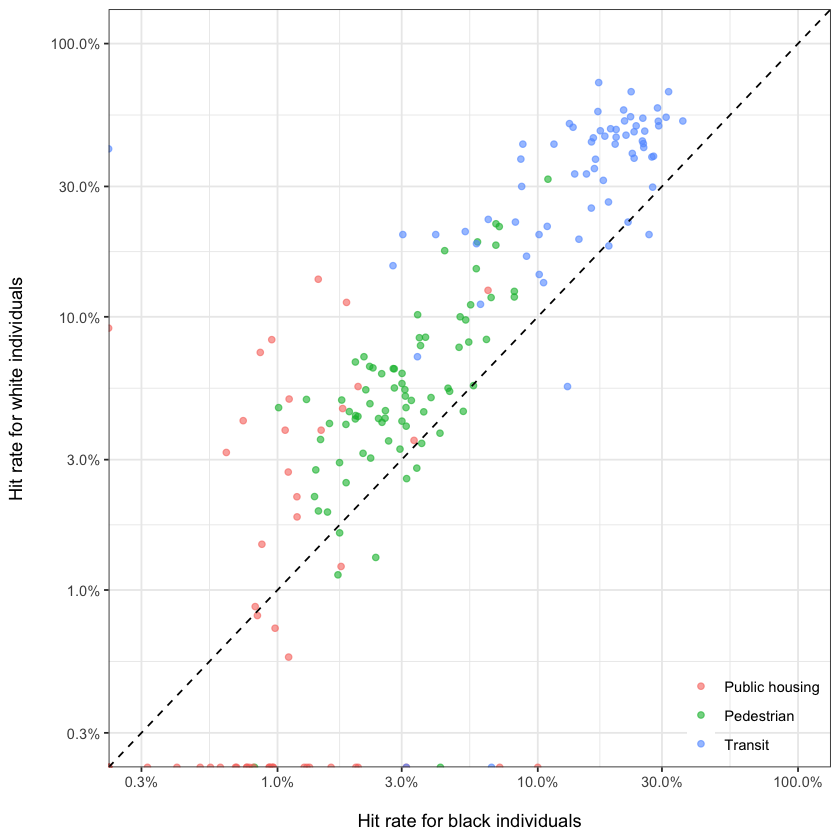

In [46]:
# Change axes to log scales
p <- ggplot(data=hitrate_by_location, aes(x=black, y=white,
                                          group=location.housing)) +
  geom_point(aes(color=location.housing), alpha=.6) +
  geom_abline(slope=1, intercept=0, linetype='dashed') +
  scale_color_discrete(element_blank(),
                       breaks=c('housing', 'neither', 'transit'),
                       labels=c('Public housing', 'Pedestrian', 'Transit')) +
  scale_x_continuous('\nHit rate for black individuals',  labels=scales::percent,
                     trans='log10', limits=c(0.003, 1),
                     breaks=c(.003, .01, .03, .1, .3, 1)) +
  scale_y_continuous('Hit rate for white individuals\n',  labels=scales::percent,
                     trans='log10', limits=c(0.003, 1),
                     breaks=c(.003, .01, .03, .1, .3, 1)) +
  theme(legend.position=c(1, 0), legend.justification=c(1, 0),
        legend.background=element_blank())

p

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


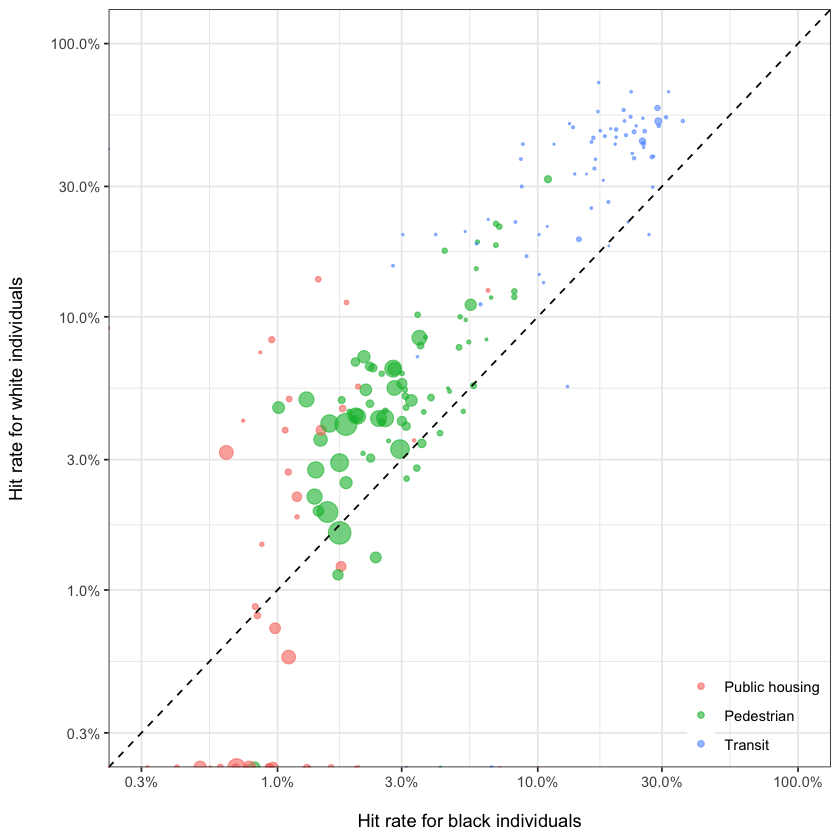

In [47]:
# Resize the points by the number of stops
p <- ggplot(data=hitrate_by_location, aes(x=black, y=white,
                                          group=location.housing)) +
  geom_point(aes(color=location.housing, size=count), alpha=.6) +
  geom_abline(slope=1, intercept=0, linetype='dashed') +
  scale_size_area(guide=FALSE) +
  scale_color_discrete(element_blank(),
                       breaks=c('housing', 'neither', 'transit'),
                       labels=c('Public housing', 'Pedestrian', 'Transit')) +
  scale_x_continuous('\nHit rate for black individuals',  labels=scales::percent,
                     trans='log10', limits=c(0.003, 1),
                     breaks=c(.003, .01, .03, .1, .3, 1)) +
  scale_y_continuous('Hit rate for white individuals\n',  labels=scales::percent,
                     trans='log10', limits=c(0.003, 1),
                     breaks=c(.003, .01, .03, .1, .3, 1)) +
  theme(legend.position=c(1, 0), legend.justification=c(1, 0),
        legend.background=element_blank())

p